In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import time



In [2]:
df_test = pd.read_csv("Test.csv")
df_train = pd.read_csv("Train.csv")

In [3]:
sample = pd.DataFrame()

In [4]:
sample["unique_id"] = df_test["uniqueid"].map(str) + " x " + df_test["country"].map(str)

In [5]:
sample

,unique_id
0,uniqueid_6056 x Kenya
1,uniqueid_6060 x Kenya
2,uniqueid_6065 x Kenya
3,uniqueid_6072 x Kenya
4,uniqueid_6073 x Kenya
...,...
10081,uniqueid_2998 x Uganda
10082,uniqueid_2999 x Uganda
10083,uniqueid_3000 x Uganda
10084,uniqueid_3001 x Uganda


In [6]:
df_test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [7]:
df_train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [8]:
df_train["lives_alone"] = ' '

In [9]:
df_train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,lives_alone
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,


In [10]:
df_train.loc[df_train.household_size == 1, "lives_alone"] = "Yes"
df_test.loc[df_test.household_size == 1, "lives_alone"] = "Yes"

In [11]:
df_train.loc[df_train.household_size > 1, "lives_alone"] = "No"
df_test.loc[df_test.household_size > 1, "lives_alone"] = "No"

In [12]:
df_train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,lives_alone
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,No
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,No
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,No
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,No
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,No
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,No


In [13]:
df_train["lives_alone"].value_counts()


No     20467
Yes     3057
Name: lives_alone, dtype: int64

In [14]:
df_train.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [15]:
num_col = []
cat_col = []
for i in df_train:
    if df_train[i].dtypes == object:
        cat_col.append(i)
    else:
        num_col.append(i)
        
num_cols = []
cat_cols = []
for i in df_test:
    if df_test[i].dtypes == object:
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [16]:
cat_cols

['country',
 'uniqueid',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'lives_alone']

In [17]:
cat_col

['country',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type',
 'lives_alone']

In [18]:
num_cols

['year', 'household_size', 'age_of_respondent']

In [19]:
num_col

['year', 'household_size', 'age_of_respondent']

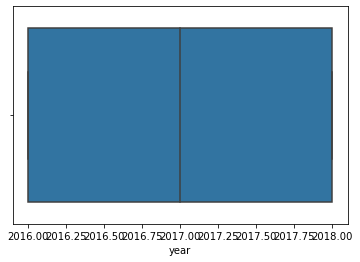

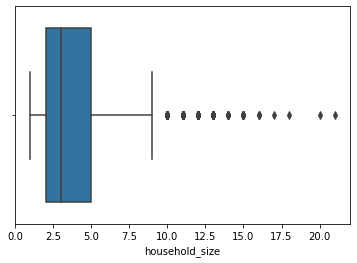

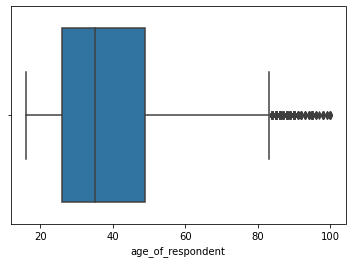

In [20]:
for i in num_col:
    sns.boxplot(data = df_train, x = i)
    plt.show()

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
 13  lives_alone             23524 non-null  object
dtypes: int64(3), object(11)
memory usage: 2.5+ MB


In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
 12  lives_alone             10086 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.0+ MB


In [23]:
'''
cat_col_to_onehotencode = ["relationship_with_head", "marital_status", "job_type"]
cat_col_to_labelencode = ["education_level", "cellphone_access", "lives_alone"]
'''




'\ncat_col_to_onehotencode = ["relationship_with_head", "marital_status", "job_type"]\ncat_col_to_labelencode = ["education_level", "cellphone_access", "lives_alone"]\n'

In [24]:
#df_train = pd.get_dummies(df_train, columns = cat_col_to_onehotencode)


In [25]:
#df_test = pd.get_dummies(df_test, columns = cat_col_to_onehotencode)

In [26]:
label = preprocessing.LabelEncoder()


In [27]:
'''
#Label encoding gender_of_respondent
df_train["gender_of_respondent"] = label.fit_transform(df_train["gender_of_respondent"])
df_test["gender_of_respondent"] = label.fit_transform(df_test["gender_of_respondent"])

#Label encoding education_level
df_train["education_level"] = label.fit_transform(df_train["education_level"])
df_test["education_level"] = label.fit_transform(df_test["education_level"])

#Label encoding location_type
df_train["location_type"] = label.fit_transform(df_train["location_type"])
df_test["location_type"] = label.fit_transform(df_test["location_type"])

#Label encoding cellphone_access
df_train["cellphone_access"] = label.fit_transform(df_train["cellphone_access"])
df_test["cellphone_access"] = label.fit_transform(df_test["cellphone_access"])



#Label encoding country
df_train["country"] = label.fit_transform(df_train["country"])
df_test["country"] = label.fit_transform(df_test["country"])

#Label encoding lives_alone
df_train["lives_alone"] = label.fit_transform(df_train["lives_alone"])
df_test["lives_alone"] = label.fit_transform(df_test["lives_alone"])
'''
#Label encoding bank_account
df_train["bank_account"] = label.fit_transform(df_train["bank_account"])



In [28]:
#drop = df_test["uniqueid"]

drop1 = df_train["household_size"]
drop2 = df_test["household_size"]

In [29]:
#dropped_drop = df_test.drop(["uniqueid"], axis = 1, inplace = True)

In [30]:
#df_train

In [31]:
#first_column = df_train.pop("unique_id")

In [32]:
#df_train.insert(0, "unique_id", first_column)

In [33]:
#dropped_cols = df_train.drop(["country", "uniqueid"], axis = 1, inplace = True)

In [34]:
#to_drop = df_train["uniqueid"]

In [35]:
#to_drop

In [36]:
#dropped_to_drop = df_train.drop(["uniqueid"], axis = 1, inplace = True)

In [37]:
df_train

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,lives_alone
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,No
1,Kenya,2018,uniqueid_2,0,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,No
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,Kenya,2018,uniqueid_5,0,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,0,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,No
23520,Uganda,2018,uniqueid_2114,0,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income,No
23521,Uganda,2018,uniqueid_2115,0,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income,No
23522,Uganda,2018,uniqueid_2116,0,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed,No


In [38]:
#num_col.remove("household_size")
#num_cols.remove("household_size")

In [39]:
y = df_train["bank_account"]

In [40]:
X = df_train.drop("bank_account", axis = 1)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
 12  lives_alone             23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [42]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn import metrics as mt
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from bayes_opt import BayesianOptimization
import xgboost as xgb
from scipy.stats import uniform, truncnorm, randint

In [44]:
scaler = StandardScaler()

In [45]:
X[num_col] = scaler.fit_transform(X[num_col]) 

In [46]:

X

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,lives_alone
0,Kenya,1.208541,uniqueid_1,Rural,Yes,-0.358007,-0.896188,Female,Spouse,Married/Living together,Secondary education,Self employed,No
1,Kenya,1.208541,uniqueid_2,Rural,No,0.539834,1.888279,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,Kenya,1.208541,uniqueid_3,Urban,Yes,0.539834,-0.775124,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,No
3,Kenya,1.208541,uniqueid_4,Rural,Yes,0.539834,-0.290869,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,Kenya,1.208541,uniqueid_5,Urban,No,1.886596,-0.775124,Male,Child,Single/Never Married,Primary education,Informally employed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,1.208541,uniqueid_2113,Rural,Yes,0.090914,0.556577,Female,Head of Household,Divorced/Seperated,No formal education,Other Income,No
23520,Uganda,1.208541,uniqueid_2114,Rural,Yes,-0.806927,-0.714592,Female,Head of Household,Single/Never Married,Secondary education,Other Income,No
23521,Uganda,1.208541,uniqueid_2115,Rural,Yes,0.539834,-0.714592,Female,Parent,Widowed,Primary education,Other Income,No
23522,Uganda,1.208541,uniqueid_2116,Urban,Yes,1.437676,-0.532997,Female,Parent,Divorced/Seperated,Secondary education,Self employed,No


In [47]:
df_test[num_cols] = scaler.fit_transform(df_test[num_cols])

In [48]:
#data_dmatrix = xgb.DMatrix(data=X,label=y)

In [49]:
#X, y = make_classification(n_samples=50000, n_features=20, n_informative=15, n_redundant=5,n_clusters_per_class=5,class_sep=0.7,flip_y=0.03,n_classes=2)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [51]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16466, 13)
(7058, 13)
(16466,)
(7058,)


In [52]:

#logreg = LogisticRegression()
#Gaus = GaussianNB()  
#Gra = GradientBoostingClassifier()
clf = CatBoostClassifier()
#xg_mod = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
'''
def gbm_cl_bo(max_depth, learning_rate, n_estimators, subsample):
    params_gbm = {}
    params_gbm['max_depth'] = round(max_depth)
    params_gbm['learning_rate'] = learning_rate
    params_gbm['n_estimators'] = round(n_estimators)
    params_gbm['subsample'] = subsample
    scores = cross_val_score(CatBoostClassifier(random_state=123, **params_gbm), X_train, y_train, cv=5).mean()
    score = scores.mean()
    return score
'''



"\ndef gbm_cl_bo(max_depth, learning_rate, n_estimators, subsample):\n    params_gbm = {}\n    params_gbm['max_depth'] = round(max_depth)\n    params_gbm['learning_rate'] = learning_rate\n    params_gbm['n_estimators'] = round(n_estimators)\n    params_gbm['subsample'] = subsample\n    scores = cross_val_score(CatBoostClassifier(random_state=123, **params_gbm), X_train, y_train, cv=5).mean()\n    score = scores.mean()\n    return score\n"

In [53]:


parameters = { "learning_rate": [0.1, 0.1391, 0.9],
               "max_depth": [4, 6, 8],
               'n_estimators': [91, 200]
             }
                 


'''
start = time.time()
params_gbm ={
    'max_depth':(3, 10),
    'learning_rate':(0.01, 0.2),
    'n_estimators':(80, 500),
    'subsample': (0.8, 1)
}
'''

"\nstart = time.time()\nparams_gbm ={\n    'max_depth':(3, 10),\n    'learning_rate':(0.01, 0.2),\n    'n_estimators':(80, 500),\n    'subsample': (0.8, 1)\n}\n"

In [54]:
Ran_clf = GridSearchCV(clf, parameters, cv = 5, scoring='accuracy', n_jobs=-1)
#gbm_bo = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=200)
#gbm_bo.maximize(init_points=20, n_iter=100)
#print('It takes %s minutes' % ((time.time() - start)/60))
   

In [55]:
categorical_var = np.where(X.dtypes != float)[0]

In [56]:
#logreg.fit(X_train, y_train)
#Gaus.fit(X_train, y_train)
#Gra.fit(X_train, y_train)
Ran_clf.fit(X_train, y_train, cat_features = categorical_var)
#xg_mod.fit(X_train, y_train)
'''
params_gbm = gbm_bo.max['params']
params_gbm['max_depth'] = round(params_gbm['max_depth'])
params_gbm['n_estimators'] = round(params_gbm['n_estimators'])
params_gbm
'''

0:	learn: 0.6057521	total: 197ms	remaining: 39.1s
1:	learn: 0.5360499	total: 241ms	remaining: 23.9s
2:	learn: 0.4788734	total: 284ms	remaining: 18.7s
3:	learn: 0.4451506	total: 330ms	remaining: 16.2s
4:	learn: 0.4139193	total: 362ms	remaining: 14.1s
5:	learn: 0.3908459	total: 396ms	remaining: 12.8s
6:	learn: 0.3730916	total: 430ms	remaining: 11.8s
7:	learn: 0.3583980	total: 462ms	remaining: 11.1s
8:	learn: 0.3477897	total: 498ms	remaining: 10.6s
9:	learn: 0.3358730	total: 531ms	remaining: 10.1s
10:	learn: 0.3284907	total: 565ms	remaining: 9.71s
11:	learn: 0.3221457	total: 597ms	remaining: 9.35s
12:	learn: 0.3175252	total: 632ms	remaining: 9.1s
13:	learn: 0.3135916	total: 671ms	remaining: 8.91s
14:	learn: 0.3103619	total: 703ms	remaining: 8.68s
15:	learn: 0.3063634	total: 754ms	remaining: 8.68s
16:	learn: 0.3040335	total: 790ms	remaining: 8.51s
17:	learn: 0.3010893	total: 833ms	remaining: 8.43s
18:	learn: 0.2992925	total: 870ms	remaining: 8.28s
19:	learn: 0.2979348	total: 905ms	remainin

161:	learn: 0.2685202	total: 5.82s	remaining: 1.36s
162:	learn: 0.2684876	total: 5.85s	remaining: 1.33s
163:	learn: 0.2684834	total: 5.88s	remaining: 1.29s
164:	learn: 0.2684286	total: 5.91s	remaining: 1.25s
165:	learn: 0.2683768	total: 5.95s	remaining: 1.22s
166:	learn: 0.2683596	total: 5.97s	remaining: 1.18s
167:	learn: 0.2683380	total: 6.01s	remaining: 1.14s
168:	learn: 0.2682603	total: 6.04s	remaining: 1.11s
169:	learn: 0.2682568	total: 6.06s	remaining: 1.07s
170:	learn: 0.2682400	total: 6.1s	remaining: 1.03s
171:	learn: 0.2682358	total: 6.13s	remaining: 999ms
172:	learn: 0.2681882	total: 6.17s	remaining: 963ms
173:	learn: 0.2680980	total: 6.2s	remaining: 927ms
174:	learn: 0.2680176	total: 6.24s	remaining: 891ms
175:	learn: 0.2679374	total: 6.27s	remaining: 855ms
176:	learn: 0.2679207	total: 6.31s	remaining: 820ms
177:	learn: 0.2678805	total: 6.36s	remaining: 785ms
178:	learn: 0.2678786	total: 6.39s	remaining: 750ms
179:	learn: 0.2678711	total: 6.42s	remaining: 714ms
180:	learn: 0.

"\nparams_gbm = gbm_bo.max['params']\nparams_gbm['max_depth'] = round(params_gbm['max_depth'])\nparams_gbm['n_estimators'] = round(params_gbm['n_estimators'])\nparams_gbm\n"

In [57]:

print(" Results from Randomized Search " )
print("\n The best estimator across ALL searched params:\n",Ran_clf.best_estimator_)
print("\n The best score across ALL searched params:\n",Ran_clf.best_score_)
print("\n The best parameters across ALL searched params:\n",Ran_clf.best_params_)




 Results from Randomized Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8900765012571974

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [58]:
cat_model = Ran_clf.predict(X_test)
#Gaus_model = Gaus.predict(X_test)
#Gra_model = Gra.predict(X_test)
#log_mod = logreg.predict_proba(X_test)
#xg_model = xg_mod.predict(X_test)

In [59]:
check = pd.DataFrame([cat_model, y])

In [60]:
check

,0,1,2,3,4,5,6,7,8,9,...,23514,23515,23516,23517,23518,23519,23520,23521,23522,23523
0,0,0,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
print(accuracy_score(y_test, cat_model))

0.8842448285633324


In [62]:
mt.mean_absolute_error(y_test, cat_model)

0.11575517143666761

In [63]:
print(f1_score(y_test, cat_model))

0.45424181696726795


In [64]:
testing = Ran_clf.predict(df_test)

In [65]:
testing

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
sub = pd.read_csv("SampleSubmission.csv")

In [67]:
sub

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
...,...,...
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0


In [68]:
sample["bank_account"] = testing

In [69]:
sample

,unique_id,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,0
10084,uniqueid_3001 x Uganda,0


In [70]:
sample["bank_account"].value_counts()

0    9318
1     768
Name: bank_account, dtype: int64

In [71]:
sample.to_csv("isitthebest.csv", index = False)